# Foundations of Data Science Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Import the necessary libraries and briefly explain the use of each library

In [40]:
# load the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Write your Answer here: 

## Read the dataset

In [41]:
# load the diabetes dataset using the 'read_csv' function in pandas

pima = pd.read_csv("diabetes.csv")

## Show the last 10 records of the dataset and the number of columns

In [42]:
# the tail function in python returns last n rows from the object based on position
# the last 5 rows of the dataframe are returned by default when no number is specified
# pass n as '10' to the tail function to display the last 10 records

pima.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76             20       79  37.5   
759            6      190             92             20       79  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31       79  44.0   
762            9       89             62             20       79  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27       79  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             20       79  30.1   
767            1       93             70             31       79  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [43]:
# total columns can be counted from the above table (9 columns)

# alternatively, the len function can be used along axis = 1 to get a count of total columns

cols_total = len(pima.axes[1])
cols_total

9

## Show the first 10 records of the dataset

In [44]:
# use the head function on the pima dataset with n as '10' to display the first 10 rows of the dataset

pima.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6      148             72             35       79  33.600000   
1            1       85             66             29       79  26.600000   
2            8      183             64             20       79  23.300000   
3            1       89             66             23       94  28.100000   
4            0      137             40             35      168  43.100000   
5            5      116             74             20       79  25.600000   
6            3       78             50             32       88  31.000000   
7           10      115             69             20       79  35.300000   
8            2      197             70             45      543  30.500000   
9            8      125             96             20       79  31.992578   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

## Find the dimension of the `pima` dataframe

In [45]:
# find the dimension of the pima dataset utilizing the 'dataframe.ndim' function

pima.ndim

2

Dimensionality is an important concept in data science and refers to the features of a dataset. Dimensions are measurements of these features along the different directions the features take e.g, all the rows in this dataset are in the same direction, and all the columns are in their same direction, therefore, we can say this dataset is 2-Dimensional.

## Find the size of the `pima` dataframe

In [46]:
# find the size of the diabetes dataset utilizing the 'dataframe.size' function

pima.size

6912

The size of a dataset in pandas is the count of total elements/data points present in the dataframe. Simply stated, it is the total number of rows multiplied by the total number of columns.

The size of the pima dataframe is 6912.

## What are the data types of all the variables in the data set?

In [47]:
# use the pandas dataframe.info() function to get a concise summary of the dataset

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The data types present in the pima dataset are two different kinds of numerical data: Integers and Floats.

## Are there any missing values in the `pima` dataframe?

In [48]:
# use isnull() function to identify missing values in the dataset

pima.isnull().values.any()

False

Missing values are data points that are not entered or recorded in a dataset, typically displayed as 'NaN'. Since the isnull function returns an output of 'False' as seen above, we deduce that there are no missing values in the pima dataframe.

## Q9. What do the summary statistics of the data represent? Find the summary statistics for all variables except 'Outcome' in the `pima` data. Take one column/variable from the output table and explain all its statistical measures. (5 Marks)

In [49]:
# use the iloc function to select data based on specified rows and columns...
# ... and apply the describe function to it to retrieve the summary statistics of the data

# we will select data from all rows, and columns except the last column labeled 'Outcome'

pima.iloc[: , 0 : 8].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.675781      72.250000      26.447917  118.270833   
std       3.369578   30.436252      12.117203       9.733872   93.243829   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.000000   79.000000   
50%       3.000000  117.000000      72.000000      23.000000   79.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.450805                  0.471876   33.240885  
std      6.875374                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25%     27.500000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

Summary statistics are used to summarize and describe the data in a condensed and organized manner, and provide information on dispersion and variance present within a dataset.

Variable: Age

- Age has a count of 768 which represents the number of data entries/rows for the variable.
- Average Age of women in the dataset is 33.2 as noted by the mean value.
- The standard deviation of Age is 11.76 ~ 11.8 meaning that data points for Age tend to lie within ± 11.8 of the mean Age i.e between Ages 21.4 to 45.
- The minimum Age of the pima women is 21 and the max Age is 81.
- 25th percentile of the women are aged 24 years and 75th percentile of the women are aged 41 years old.
- The median/middle value of Age (represented by the 50th percentile) of the pima women is 29.
- 50% of the women are between the ages of 24 and 41.

The distribution of Age is right skewed with most of the data points lying on the left side of the graph. Visulaizing the distribution of Age data will give a right-skewed histogram with its mean towards the right side.

## Plot the distribution plot for the variable 'BloodPressure'. Write detailed observations from the plot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


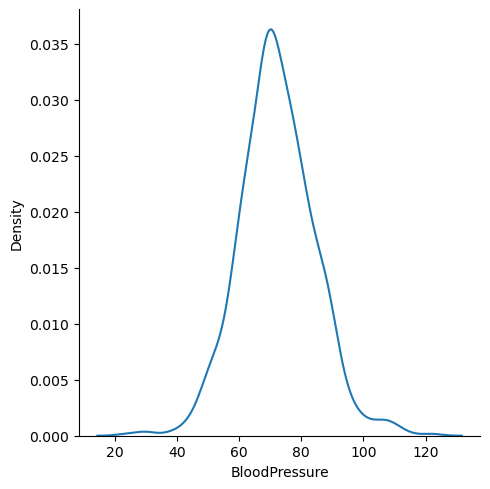

In [50]:
# use the displot funcition from seaborn to make a distribution plot

sns.displot(pima['BloodPressure'], kind = 'kde')

plt.show()

The variable BloodPressure follows a normal distribution that is symmetric about the mean. This conveys that most data lies in the central region close to the mean, and fewer data points lie far from the mean. The mean, median, and mode are all equal to each other.

- 68.2% of the observations will be found within ± one standard deviation of the mean.
- 95.4% of the observations will be found within ± two standard deviations.
- 99.7% of the observations will be found within ± three standard deviations.

This tells us that most of our data lies within 3 standard deviations of the mean and it would be unlikely to see data observed further away.

## What is the 'BMI' of the person having the highest 'Glucose'?

In [51]:
# use the max function on variable 'Glucose' to find the corresponding value of 'BMI'

pima[pima['Glucose'] == pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

The 'BMI' of the person with the highest 'Glucose' value is 42.9 Since this is a comparison between 2 single data points only, we cannot make deductions from it.

### What is the mean of the variable 'BMI'? 
### What is the median of the variable 'BMI'? 
### What is the mode of the variable 'BMI'?
### Are the three measures of central tendency equal?

In [52]:
# calculate the mean, median, and mode values of BMI

m1 = pima['BMI'].mean()  # mean
print(m1)

m2 = pima['BMI'].median()  # median
print(m2)

m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543619
32.0
32.0


- mean = 32.45
- median = 32.0
- mode = 32.0

The three measures of central tendency are equal. The mean is slightly higher by a value of 0.45, but this is within 1 standard deviation of 6.89 and is therefore not significant. It may be inferred that BMI follows a normal distribution with data points spread symmetrically about the mean on either side.

## How many women's 'Glucose' levels are above the mean level of 'Glucose'?

In [53]:
# calcualte the number of women with glucose levels above the mean

pima[pima['Glucose'] > pima['Glucose'].mean()].shape[0]

343

343 out of total 768 women have Glucose levels above the mean value.

- This means that roughly 55% of women have Glucose levels below the mean value.
- This by itself doesn't give us information on incidence of diabetes as low blood glucose is seen in type 1 diabetes (compared to high glucose levels in type 2 diabetes).
- If we look at the summary statistics we see that the 25th percentile is at glucose levels of 99.75, 50th percentile at 117, and 75th percentile at 140.25.
- Assuming normal glucose levels to be approximately between 100 - 140, we could say that at least 50% of the women are not diabetic. However, other factors should be considered about the population such as whether any of the women are taking any medication for diabetes already that would put their glucose levels within the normal range.

## How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'?

In [54]:
# calculate the number of women who have BloodPressure equal to its median value and a BMI value lower than the BMI median

pima[(pima['BloodPressure'] == pima['BloodPressure'].median()) & (pima['BMI'] < pima['BMI'].median())]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
14             5      166             72             19      175  25.8   
93             4      134             72             20       79  23.8   
103            1       81             72             18       40  26.6   
205            5      111             72             28       79  23.9   
299            8      112             72             20       79  23.6   
325            1      157             72             21      168  25.6   
330            8      118             72             19       79  23.1   
366            6      124             72             20       79  27.6   
380            1      107             72             30       82  30.8   
393            4      116             72             12       87  22.1   
406            4      115             72             20       79  28.9   
446            1      100             72             12       70  25.3   
460            9      120             72             22       56  20.8   
488            4       99             72             17       79  25.6   
497            2       81             72             15       76  30.1   
510           12       84             72             31       79  29.7   
568            4      154             72             29      126  31.3   
615            3      106             72             20       79  25.8   
635           13      104             72             20       79  31.2   
644            3      103             72             30      152  27.6   
717           10       94             72             18       79  23.1   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
14                      0.587   51        1  
93                      0.277   60        1  
103                     0.283   24        0  
205                     0.407   27        0  
299                     0.840   58        0  
325                     0.123   24        0  
330                     1.476   46        0  
366                     0.368   29        1  
380                     0.821   24        0  
393                     0.463   37        0  
406                     0.376   46        1  
446                     0.658   28        0  
460                     0.733   48        0  
488                     0.294   28        0  
497                     0.547   25        0  
510                     0.297   46        1  
568                     0.338   37        0  
615                     0.207   27        0  
635                     0.465   38        1  
644                     0.730   27        0  
717                     0.595   56        0  
765                     0.245   30        0

22 of 768 pima women have a median diastolic BloodPressure of 72 mmHg, and a lower than median BMI value of 32.

## Create a pairplot for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'. Write the observations from the plot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


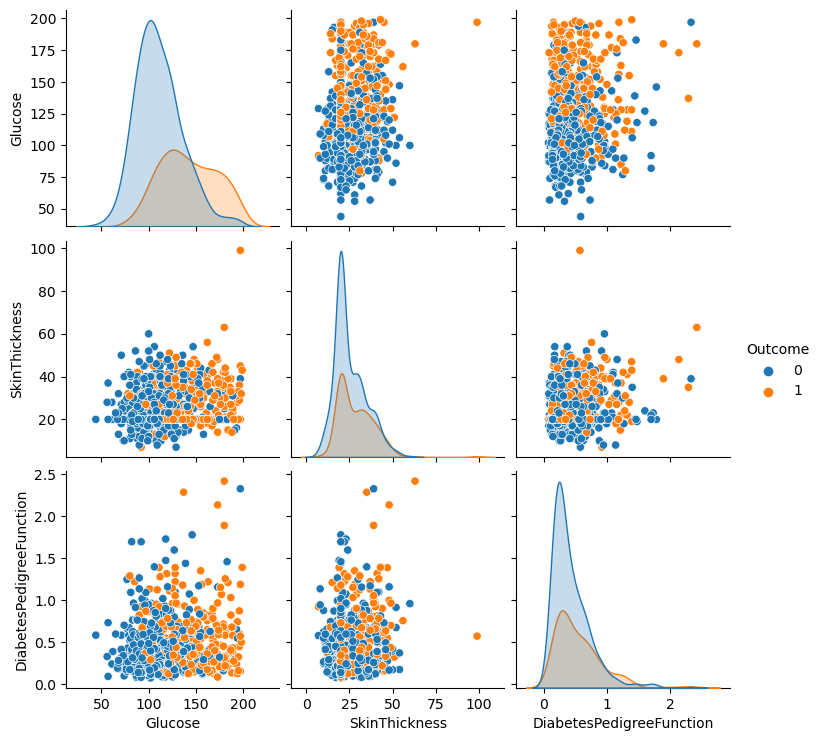

In [55]:
# create a pairplot of variables Glucose, SkinThickness, and DiabetesPedigreeFunction

sns.pairplot(data = pima, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

Obeservations:

- High levels of glucose are associated with high incidence of diabetes.
- No strong correlations observed for SkinThickness and DiabetesPedigreeFunction

## Plot the scatterplot between 'Glucose' and 'Insulin'. Write the observations from the plot.

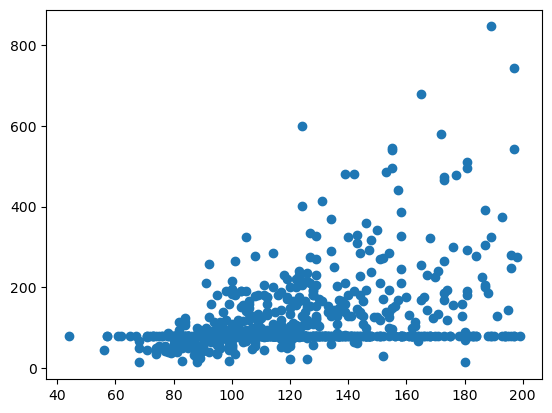

In [56]:
# make a scatterplot with glucose on the x-axis and insulin on the y-axis

plt.scatter(x = 'Glucose', y = 'Insulin', data = pima)
plt.show()

- The scatterplot shows correlation between levels of glucose and levels of insulin. With increasing glucose levels, we see insulin levels increase over time as well. However, the rate at which insulin levels increase is lower than the rate of increase in glucose levels.
- We can also see that there's a cluster of data points between the glucose values 100 - 140. This is the interquartile range (25th to 75th percentile) consisting of 50% of the pima women.
- The scatterplot also shows datapoints forming almost a line horizontally at approximately insulin level of 100. Here we can see that insulin levels do not increase with increasing glucose levels. We could make the assumption here that these are the women with severe type 2 diabetes

## Plot the boxplot for the 'Age' variable. Are there outliers?

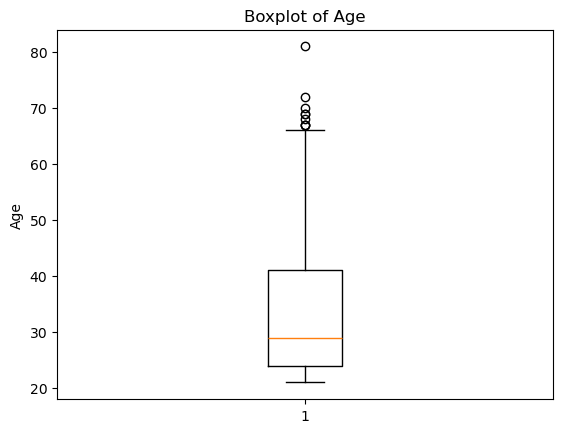

In [57]:
# create a boxplot for Age

plt.boxplot(pima['Age'])

# label the boxplot

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

Yes, outliers are present.

There are several mild outliers seen closer to the cut off at Q3 + 1.5 * IQR, and there's an extreme outlier at the top corresponding to age 81 on the y-axis.

- The boxplot of Age confirms our previous observations based on the summary statistics.
- 25% of women represented by the lower whisker are between 24 - 29 years old.
- The minimum Age of the pima women is 21.
- The median/middle value of Age at the 50th percentile is 29.
- The maximum age of 81 is represented here by the extreme outlier.
- 50% of the women are between 24 and 41 years old.

We can see that most data points are towards the bottom of the graph. If we make a distribution plot with Age on the x-axis, we will observe a right skewed distribution.

## Plot histograms for the 'Age' variable to understand the number of women in different age groups given whether they have diabetes or not. Explain both histograms and compare them.

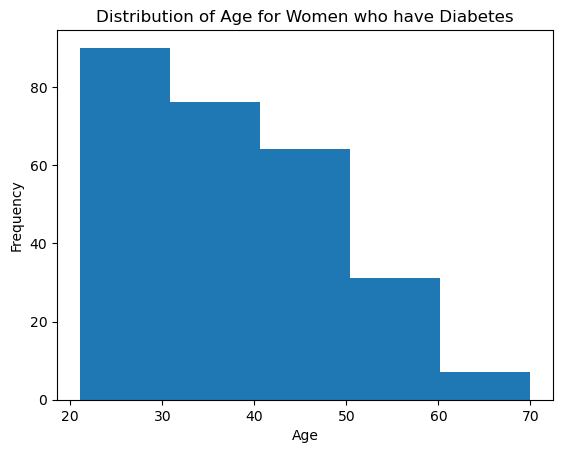

In [58]:
plt.hist(pima[pima['Outcome'] == 1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Women with Diabetes:

- The data is plotted for Age range 21 - 70 divided into 5 groups of increasing age.
- Incidence of diabetes is highest for the 21-31 age group and subsequently decreases with each group of increasing age.
- Lowest incidence of diabetes is seen in the oldest group between ages 60 - 70

Conclusions:

- Incidence of diabetes is not decreasing with increasing age, but rather that either diabetes or another illness is resulting in increasing number of deaths with increasing age. Incidence of diabetes could possibly be associated with existence of another life threatening illness perhaps.
- Differences in lifestyle or eating habits between younger and older women, such that harmful/risky habits present are more prevalent in the younger groups.

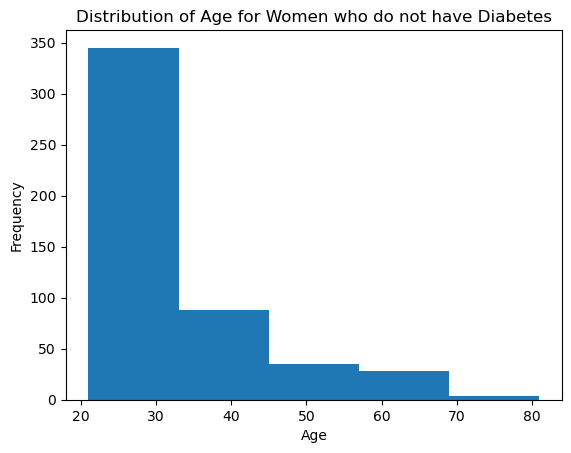

In [59]:
plt.hist(pima[pima['Outcome'] == 0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Women without Diabetes:

- The data is plotted for Age range 21 - 81 divided into 5 groups of increasing age.
- Incidence of diabetes is highest for the 21-31 age group and significantly decreases for the next groups with increasing age.

Final Conclusion:

- Now if we consider the summary statistics and spread of our data for 'Age', it would be important to note that majority of the women in our dataset are under the age of 41 which corresponds to the 75th percentile (Q3). The distribution of Age is positively/right skewed. We could say there's a samplying bias and the data gives the false impression that incidence of diabetes in pima women decreases as age increases.

## What is the Interquartile Range of all the variables? Why is this used? Which plot visualizes the same?

In [60]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


- Interquartile range of all the variables: Pregnancies 5.0000 Glucose 40.5000 BloodPressure 16.0000 SkinThickness 12.0000 Insulin 48.2500 BMI 9.1000 DiabetesPedigreeFunction 0.3825 Age 17.0000 Outcome 1.0000 dtype: float64

- Interquartile range is used to assess the dispersion of data within a dataset, and to identify outliers that can affect the mean value.

- Boxplots are used for this visualization.

## Find and visualize the correlation matrix. Write the observations from the plot.

In [61]:
corr_matrix = pima.iloc[ : ,0 : 8].corr()

corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128022       0.208987       0.009393   
Glucose                      0.128022  1.000000       0.219765       0.158060   
BloodPressure                0.208987  0.219765       1.000000       0.130403   
SkinThickness                0.009393  0.158060       0.130403       1.000000   
Insulin                     -0.018780  0.396137       0.010492       0.245410   
BMI                          0.021546  0.231464       0.281222       0.532552   
DiabetesPedigreeFunction    -0.033523  0.137158       0.000471       0.157196   
Age                          0.544341  0.266673       0.326791       0.020582   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018780  0.021546                 -0.033523   
Glucose                   0.396137  0.231464                  0.137158   
BloodPressure             0.010492  0.281222                  0.000471   
SkinThickness             0.245410  0.532552                  0.157196   
Insulin                   1.000000  0.189919                  0.158243   
BMI                       0.189919  1.000000                  0.153508   
DiabetesPedigreeFunction  0.158243  0.153508                  1.000000   
Age                       0.037676  0.025748                  0.033561   

                               Age  
Pregnancies               0.544341  
Glucose                   0.266673  
BloodPressure             0.326791  
SkinThickness             0.020582  
Insulin                   0.037676  
BMI                       0.025748  
DiabetesPedigreeFunction  0.033561  
Age                       1.000000

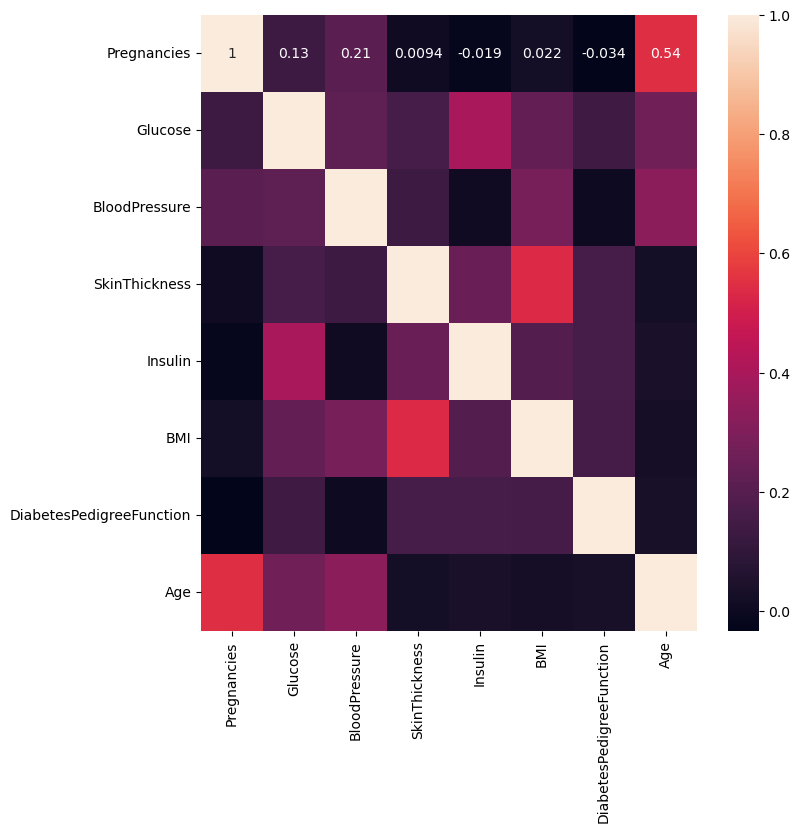

In [62]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_matrix, annot = True)

# Display the plot
plt.show()

Observations:

- Diagonal values of 1 can be disregarded as they represent correlation of the variable with itself only.
- SkinThickness and BMI display moderate correlation of value 0.53
- Low-moderate correlation between Age and BloodPressure of value 0.33